In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


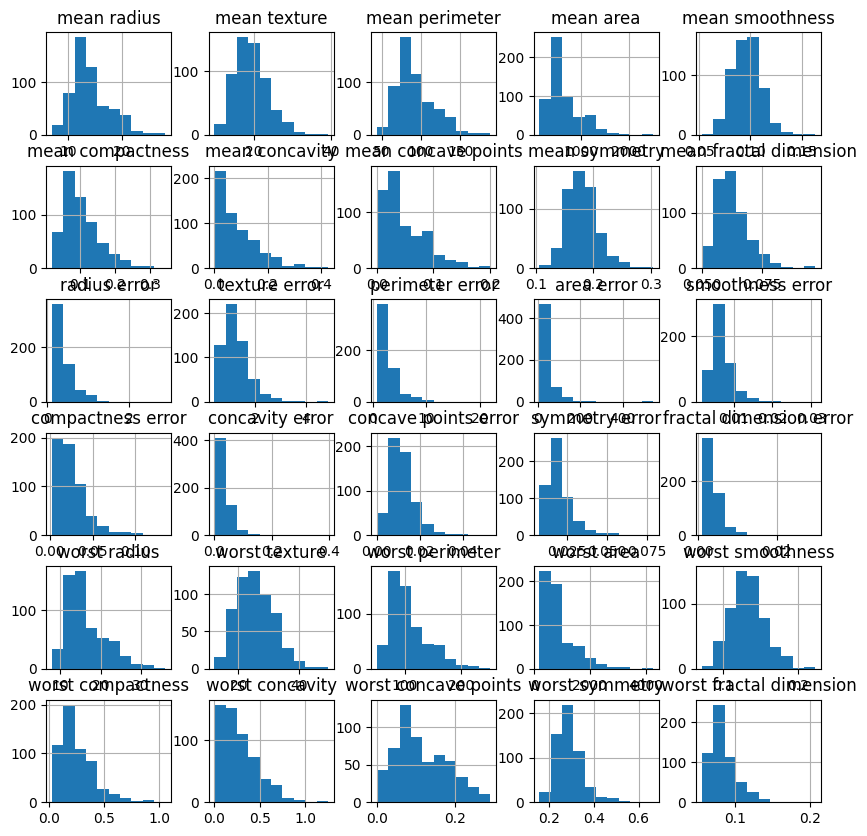

In [5]:
dataframe = pd.DataFrame(data.data, columns=data.feature_names)
dataframe.hist(figsize=(10, 10))
plt.show()


In [10]:
#i need to split the data, it is a binary classification model as either malignant or benign
#import train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
#use standard scaler to normalize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



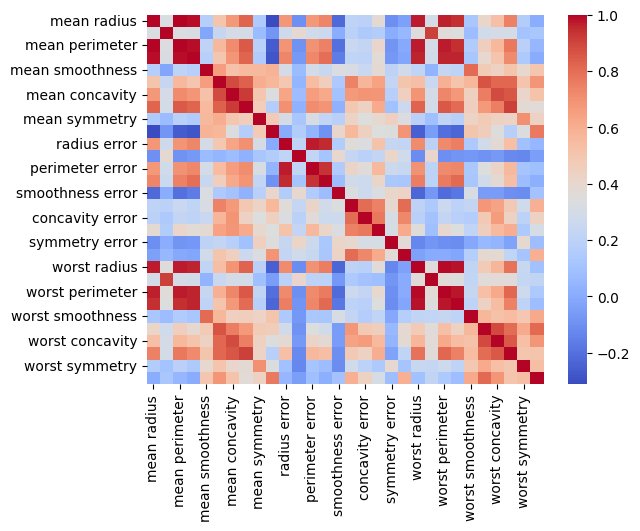

In [11]:
#generating a heatmap to determine the correlation between the features using seaborn without annotation numbers for a cleaner look
import seaborn as sns
correlation_matrix = sns.heatmap(dataframe.corr(), annot=False, cmap='coolwarm')
plt.show()


In [ ]:
#creating the model, it is a binary classification model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# add validation split and early stopping to avoid overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

r = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4198 - loss: 0.7598   
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6637 - loss: 0.6114 
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8066 - loss: 0.4993 
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8967 - loss: 0.4140 
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.3502 
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9363 - loss: 0.3003 
Epoch 7/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9407 - loss: 0.2637 
Epoch 8/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.2342 
Epoch 9/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9538 - loss: 0.2114 
Epoch 10/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.1937 
Epoch 11/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9648 - loss: 0.1785 
Epoch 12/1000
15/15 ━━━━━━━━━━━━━━━━━━━

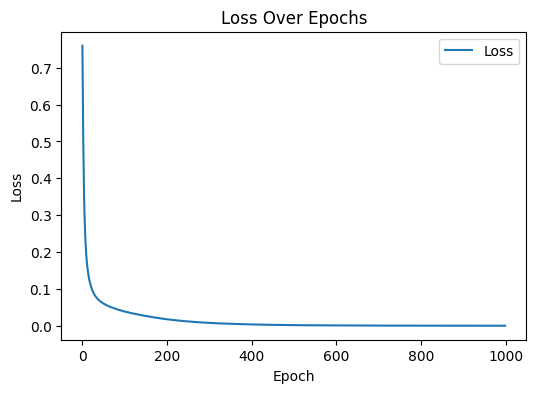

In [14]:
# Visualizing log loss (binary cross-entropy loss) during training
plt.figure(figsize=(6, 4))
plt.plot(r.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [15]:
#finding the accuracy of the model
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9825 - loss: 0.2745 


[0.2744767665863037, 0.9824561476707458]

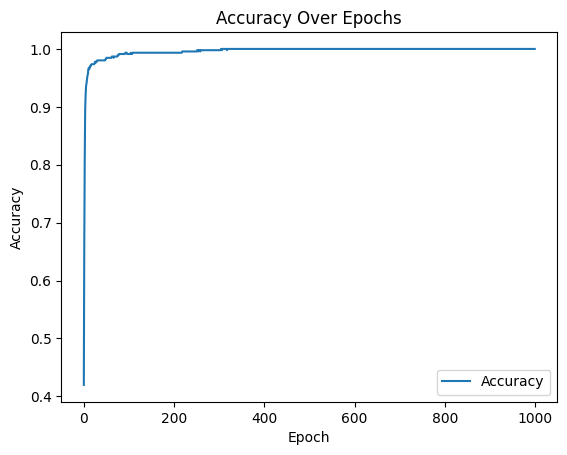

In [16]:
#plotting the accuracy of the model
plt.plot(r.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

In [17]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


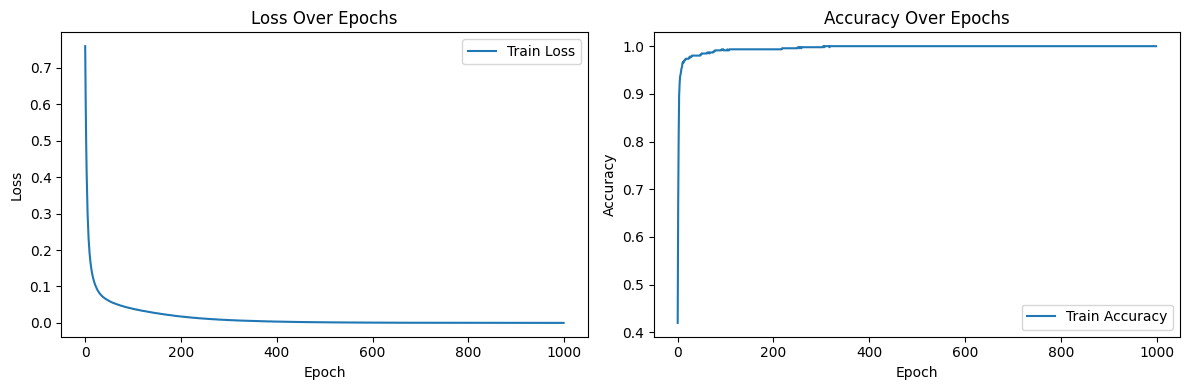

In [19]:
# Plot training vs validation loss and accuracy
plt.figure(figsize=(12, 4))

# Left: loss
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='Train Loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Right: accuracy
plt.subplot(1, 2, 2)
plt.plot(r.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Classification report for precision, recall, and F1-score
from sklearn.metrics import classification_report

y_prob = model.predict(x_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=data.target_names))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



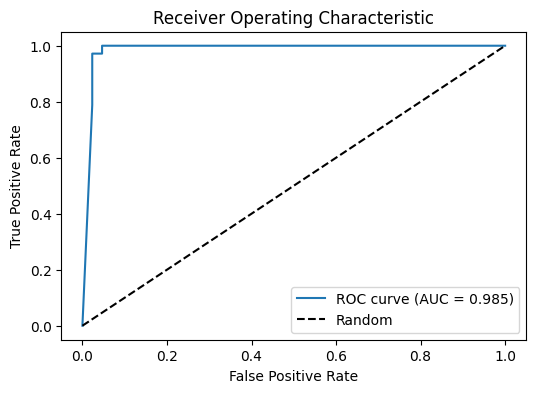

In [21]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
